# Pymaceuticals Inc.
---

### Analysis

- **Capomulin and Ramicane** were the most effective regimens in reducing tumor volumes. Both regimens have the lowest mean tumor volumes, with values of **40.68 mm³**and **40.22** mm³, respectively. Their tight distributions (low variance and standard deviation) suggest consistent efficacy in tumor size reduction compared to other regimens like Ketapril or Ceftamin.
- A strong positive correlation (**r = 0.84**) exists between mouse weight and tumor volume under the Capomulin regimen. This indicates that heavier mice tend to have larger tumor volumes. Understanding this relationship can help optimize dosing for treatment efficacy.
- The pie chart reveals a relatively even distribution of male and female mice in the study. This ensures that results are unbiased across genders and representative of the population.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(study_results, mouse_metadata,  on="Mouse ID")

# Display the data table for preview
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
num_mice = combined_data["Mouse ID"].nunique()
num_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
duplicate_mice = combined_data[combined_data.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]

# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mouse_ids = duplicate_mice["Mouse ID"].unique()
duplicate_mouse_ids

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mouse_data = combined_data[combined_data["Mouse ID"] == "g989"]
duplicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_data[combined_data["Mouse ID"] != "g989"]
clean_data.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
num_mice_clean = clean_data["Mouse ID"].nunique()
num_mice_clean

248

## Summary Statistics

In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
mean_tumor_volume = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median_tumor_volume = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
tumor_volume_variance = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
tumor_volume_std_dev = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
tumor_volume_sem = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.
summary_stats = pd.DataFrame({
    "Mean Tumor Volume": mean_tumor_volume,
    "Median Tumor Volume": median_tumor_volume,
    "Tumor Volume Variance": tumor_volume_variance,
    "Tumor Volume Std. Dev.": tumor_volume_std_dev,
    "Tumor Volume Std. Err.": tumor_volume_sem
})

summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [15]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats = clean_data.groupby("Drug Regimen").agg(
    {"Tumor Volume (mm3)":
    ["mean",
    "median",
    "var",
    "std",
    "sem"]
})

summary_stats

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

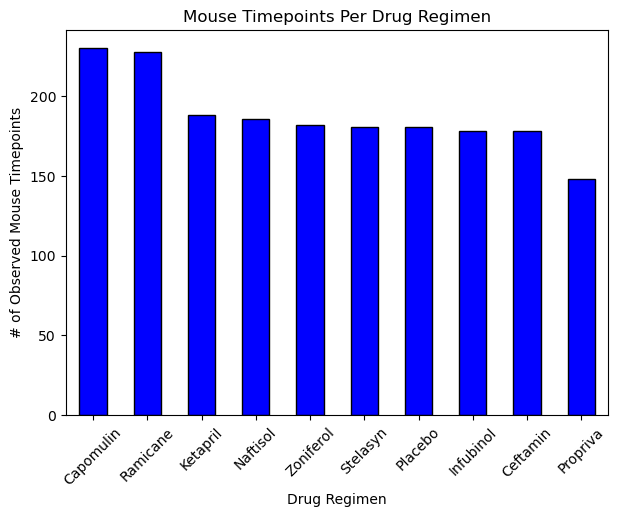

In [17]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

# Calculate the total number of rows for each drug regimen
total_rows_per_regimen = clean_data["Drug Regimen"].value_counts()

# Generate a bar plot
total_rows_per_regimen.plot(kind="bar", color="blue", figsize=(7, 5), edgecolor="black")

# Customize the plot
plt.title("Mouse Timepoints Per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation=45)
plt.show()

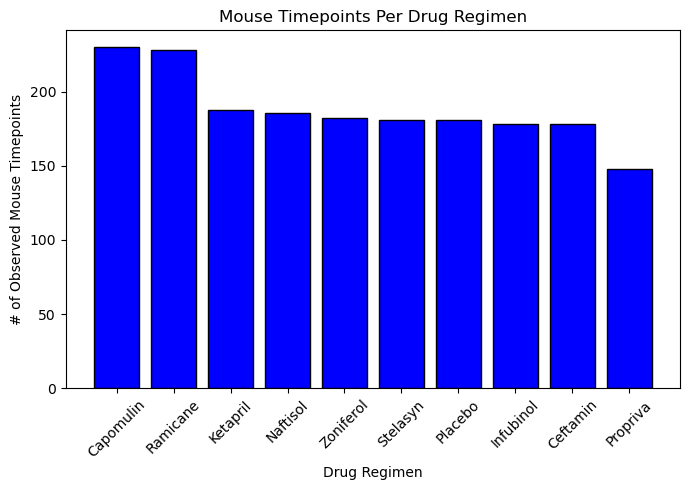

In [19]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Calculate the total number of rows for each drug regimen
total_rows_per_regimen = clean_data["Drug Regimen"].value_counts()

# Create the bar plot using pyplot
plt.figure(figsize=(7, 5))  # Set the figure size
plt.bar(total_rows_per_regimen.index, total_rows_per_regimen.values, color="blue", edgecolor="black")

# Customize the plot
plt.title("Mouse Timepoints Per Drug Regimen", fontsize=12)
plt.xlabel("Drug Regimen", fontsize=10)
plt.ylabel("# of Observed Mouse Timepoints", fontsize=10)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to avoid clipping of labels
plt.show()

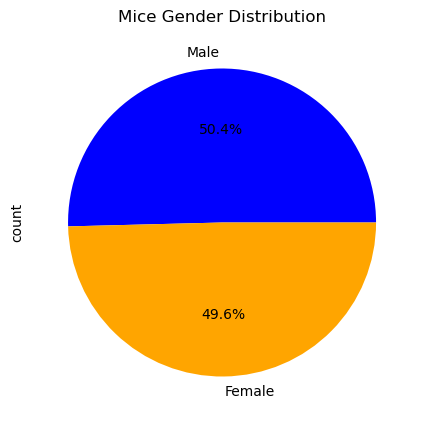

In [21]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
unique_mice = clean_data.drop_duplicates(subset=["Mouse ID"])
gender_distribution = unique_mice["Sex"].value_counts()

# Make the pie chart
gender_distribution.plot(kind="pie", 
                         autopct="%1.1f%%", 
                         startangle=360, 
                         figsize=(7, 5), 
                         colors=["blue", "orange"], 
                         labels=["Male", "Female"])
plt.title("Mice Gender Distribution")
plt.show()

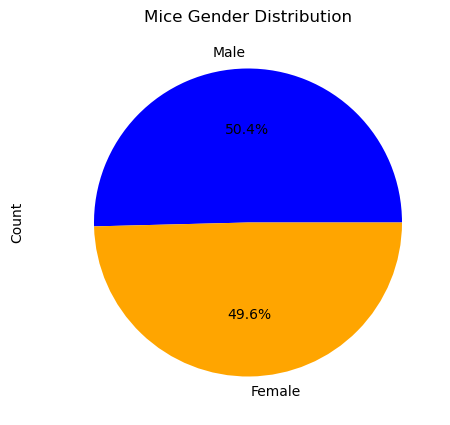

In [23]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
unique_mice = clean_data.drop_duplicates(subset=["Mouse ID"])
gender_distribution = unique_mice["Sex"].value_counts()

# Make the pie chart
plt.figure(figsize=(7, 5))  # Set the figure size
plt.pie(gender_distribution, 
        labels=gender_distribution.index, 
        autopct="%1.1f%%", 
        startangle=360, 
        colors=["blue", "orange"], 
        textprops={"fontsize": 10})
plt.title("Mice Gender Distribution", fontsize=12)
plt.text(-1.5, 0, "Count", fontsize=10, ha="center", va="center", rotation=90)
plt.show()

## Quartiles, Outliers and Boxplots

In [25]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
filtered_data = clean_data[clean_data["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = filtered_data.groupby("Mouse ID")["Timepoint"].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(last_timepoint, filtered_data, on=["Mouse ID", "Timepoint"])

In [27]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in treatments:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset
    treatment_data = final_tumor_volume[final_tumor_volume["Drug Regimen"] == treatment]["Tumor Volume (mm3)"]
    tumor_vol_data.append(treatment_data)

    # Determine outliers using upper and lower bounds
    quartiles = treatment_data.quantile([0.25, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    
    lower_bound = lower_quartile - (1.5 * iqr)
    upper_bound = upper_quartile + (1.5 * iqr)
    
    # Identify any potential outliers
    outliers = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)]
    print(f"{treatment}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


C:\Users\User\AppData\Local\Temp\ipykernel_18816\3150010158.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(tumor_vol_data, labels=treatments, patch_artist=True,


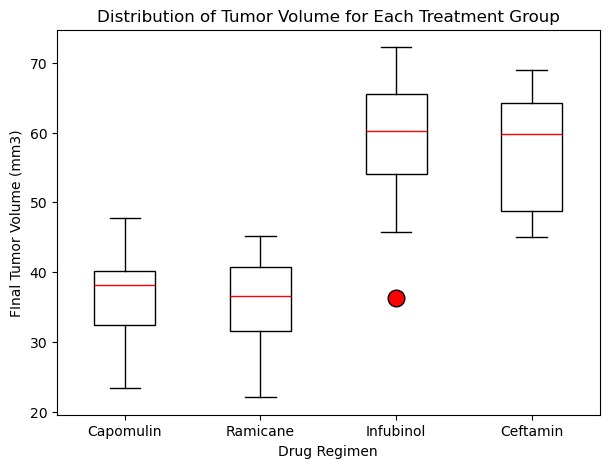

In [29]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.figure(figsize=(7, 5))  # Set the figure size
plt.boxplot(tumor_vol_data, labels=treatments, patch_artist=True, 
            boxprops=dict(facecolor="white", color="black"),
            medianprops=dict(color="red"), whiskerprops=dict(color="black"),
            capprops=dict(color="black"),
            flierprops=dict(marker="o", markerfacecolor="red", markersize=12)  # Customize outlier dot
)

# Customize the plot
plt.title("Distribution of Tumor Volume for Each Treatment Group", fontsize=12)
plt.xlabel("Drug Regimen", fontsize=10)
plt.ylabel("FInal Tumor Volume (mm3)", fontsize=10)
plt.show()

## Line and Scatter Plots

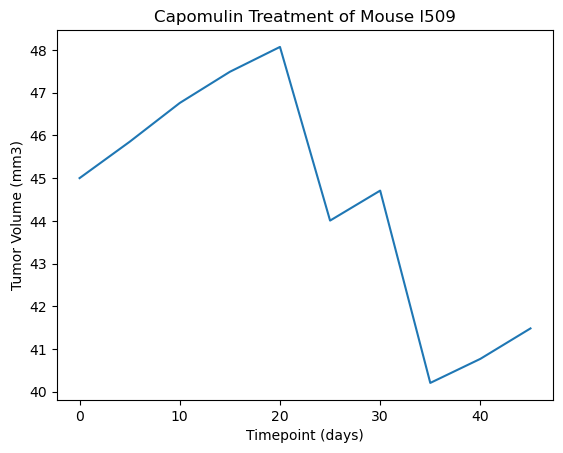

In [32]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_table =  clean_data.loc[clean_data['Drug Regimen'] == "Capomulin"]
mouse_data = capomulin_table.loc[capomulin_table["Mouse ID"] == "l509"]

# Generate the line plot
plt.plot(mouse_data["Timepoint"], mouse_data["Tumor Volume (mm3)"])
plt.title("Capomulin Treatment of Mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

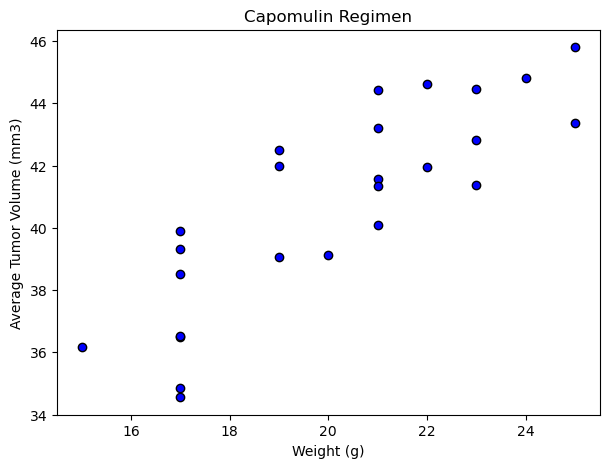

In [34]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Filter the data for the Capomulin regime
capomulin_data = clean_data[clean_data["Drug Regimen"] == "Capomulin"]

# Group by Mouse ID and calculate the average tumor volume
avg_tumor_volume = capomulin_data.groupby("Mouse ID").agg(
    {"Weight (g)": "mean", "Tumor Volume (mm3)": "mean"}
).reset_index()

# Create the scatter plot
plt.figure(figsize=(7, 5))
plt.scatter(avg_tumor_volume["Weight (g)"], avg_tumor_volume["Tumor Volume (mm3)"], color="blue", edgecolor="black")
plt.title("Capomulin Regimen")
plt.xlabel("Weight (g)", fontsize=10)
plt.ylabel("Average Tumor Volume (mm3)", fontsize=10)
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


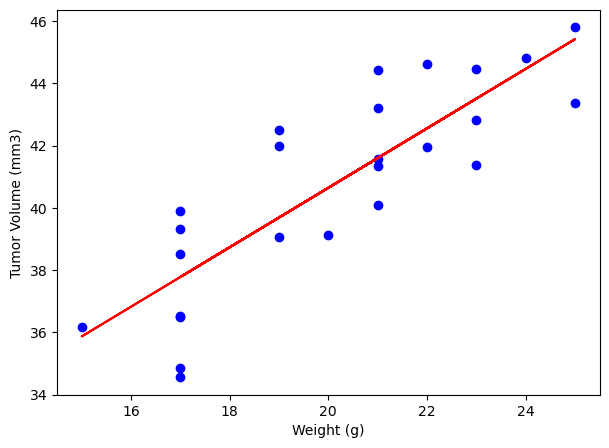

In [37]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Calculate the correlation coefficient
correlation = np.corrcoef(avg_tumor_volume["Weight (g)"], avg_tumor_volume["Tumor Volume (mm3)"])[0, 1]
print(f"The correlation between mouse weight and the average tumor volume is {correlation:.2f}")

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(
    avg_tumor_volume["Weight (g)"], avg_tumor_volume["Tumor Volume (mm3)"]
)
# print(f"Linear Regression Model: y = {slope:.2f}x + {intercept:.2f}") - if need to see the Linear Regression Model

# Generate scatter plot with regression line
plt.figure(figsize=(7, 5))
plt.scatter(avg_tumor_volume["Weight (g)"], avg_tumor_volume["Tumor Volume (mm3)"], label="Mouse Data", color="blue")
plt.plot(avg_tumor_volume["Weight (g)"], 
         slope * avg_tumor_volume["Weight (g)"] + intercept, 
         color="red", label="Regression Line")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()